# Reconocimiento de Entidades Nombradas (NER)


### Autores: Lucas Tarazona y Samuel Arteaga

### 1. Importación de librerías

In [ ]:
import spacy
from transformers import pipeline
from seqeval.metrics import classification_report as seqeval_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report

c:\Users\ESP\Desktop\ModelosIA\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 2. Textos a analizar

In [2]:
textos = list({
                  "El acuerdo entre la compañía ACME Corp. y el distribuidor GlobalTech garantiza la entrega en un máximo de 45 días."
                  "Según la Ley 12/2020 de Transparencia, las instituciones deben publicar informes anuales de sus actividades."
                  "El proveedor SoftSystems deberá suministrar el software antes del 15 de marzo de 2024, según lo pactado en el contrato."
                  "La empresa Innovatech firmó un convenio con la Universidad Nacional para el desarrollo de nuevas tecnologías."
                  "De acuerdo con el Decreto 458/2019, las entidades bancarias deben implementar medidas de ciberseguridad."
                  "El contrato firmado con DataSecure estipula que los servidores estarán operativos 24/7 durante cinco años."
                  "La normativa ISO 27001 establece los estándares de seguridad en la gestión de datos empresariales."
                  "El Ministerio de Salud emitió la Resolución 189/2021 sobre la regulación de medicamentos genéricos."
                  "La multinacional TechSolutions anunció una inversión de 10 millones de euros en inteligencia artificial."
                  "La Ley Orgánica 3/2018 regula el tratamiento de datos personales en el ámbito empresarial."
                  "El acuerdo comercial entre EU y México establece aranceles reducidos para la importación de tecnología."
                  "El Banco Nacional deberá cumplir con las regulaciones de la Ley 45/2022 sobre transparencia financiera."
                  "La empresa LogiTransport acordó con la municipalidad mejorar las rutas de distribución en un plazo de 6 meses."
                  "El Reglamento Europeo 679/2016 establece normas estrictas sobre la protección de datos personales."
                  "La Ley 15/2019 obliga a las compañías aseguradoras a ofrecer cobertura mínima a sus clientes."
                  "Según el contrato con PharmaMed, los hospitales recibirán insumos médicos cada trimestre."
                  "El gobierno firmó un convenio con EnergyGreen para el desarrollo de energías renovables."
                  "La Resolución 320/2020 impone límites a la publicidad de productos con alto contenido de azúcar."
                  "La startup FinTechGo recibió una ronda de financiamiento de 5 millones de dólares."
                  "La Ley Federal de Protección al Consumidor exige que los productos incluyan información nutricional clara."
                  "El contrato entre el Gobierno de España y CyberDefend cubre la seguridad cibernética en infraestructuras críticas."
                  "El fabricante de automóviles AutoMundo anunció una alianza con EcoBattery para vehículos eléctricos."
                  "Según la Ley 23/2017, los comercios deben aceptar pagos electrónicos sin recargos adicionales."
                  "La aerolínea SkyTravel firmó un acuerdo con la Agencia Europea de Seguridad Aérea para modernizar sus aviones."
                  "La nueva Ley 89/2021 busca reducir las emisiones de CO₂ en un 30 por ciento antes de 2030."
                  "El Tribunal Supremo falló a favor de la empresa SolarTech en un litigio por patentes."
                  "El contrato con la aseguradora GlobalProtect establece una cobertura total de responsabilidad civil."
                  "La Resolución 55/2022 prohíbe la venta de plásticos de un solo uso en establecimientos comerciales."
                  "El acuerdo entre el Banco Central y FinRegTech facilitará la supervisión financiera digital."
                  "La multinacional FoodCorp deberá reformular sus productos según lo estipulado en la Ley 11/2023."
                  "El gobierno de Chile firmó un tratado con BioGenTech para la investigación de nuevas vacunas."
                  "La Ley de Propiedad Intelectual protege las creaciones artísticas y científicas durante 70 años."
                  "El acuerdo de cooperación entre Japón y Brasil fomentará la inversión en infraestructura."
                  "Según el Decreto 101/2020, las plataformas digitales deben pagar impuestos locales en sus países de operación."
                  "La Resolución 220/2019 impone restricciones a la importación de productos electrónicos sin certificación."
                  "La empresa MedicaPlus anunció la adquisición de HealthCorp por 2.500 millones de dólares."
                  "El Reglamento 140/2021 de la Unión Europea establece normas para la venta de productos ecológicos."
                  "El contrato de abastecimiento entre PetroGlobal y Refinería Sur se extenderá hasta 2028."
                  "La Ley 30/2015 establece incentivos fiscales para empresas que inviertan en desarrollo tecnológico."
                  "El gobierno local otorgó una concesión a AquaSolutions para la gestión del suministro de agua potable."
                  "El fabricante de semiconductores ChipMaster anunció una expansión en su planta de producción en Taiwán."
                  "Según la Resolución 77/2023, los bancos deben ofrecer atención al cliente en todos los idiomas oficiales del país."
                  "El Tribunal de Justicia de la Unión Europea sancionó a DataFirm por incumplimiento de la GDPR."
                  "La empresa de logística FastTrack acordó reducir su huella de carbono en un 20% para 2025."
                  "La Ley 42/2020 establece penas más severas para delitos relacionados con la ciberdelincuencia."
                  "El Banco Mundial aprobó un préstamo de 500 millones de dólares para proyectos de infraestructura en África."
                  "El acuerdo de libre comercio entre Canadá y Reino Unido entrará en vigor el 1 de enero de 2025."
                  "Según el Decreto 78/2022, las empresas deben ofrecer teletrabajo a empleados con hijos menores de 5 años."
                  "La aerolínea GlobalWings recibió la certificación ISO 9001 por su excelencia en servicio al cliente."
                  "El contrato de concesión firmado con InfraBuild prevé la construcción de 10 puentes en los próximos 5 años."})

### 3. Carga de modelos

En este caso utilizaremos el modelo small de Spacy pues tenemos pocas muestras de datos

In [3]:
nlp = spacy.load("es_core_news_sm")  # Modelo de Spacy
ner_pipeline = pipeline("ner", model="PlanTL-GOB-ES/roberta-base-bne", aggregation_strategy="simple")

Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at PlanTL-GOB-ES/roberta-base-bne and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu


### 4. Evaluación de NER con spaCy

In [4]:
print("\n===== Análisis con spaCy =====")
for texto in textos:
    doc = nlp(texto)
    print("\nTexto:", texto)
    if doc.ents:
        print("Entidades reconocidas:")
        for ent in doc.ents:
            print(f" - {ent.text} ({ent.label_})")
    else:
        print(" - No se encontraron entidades.")


===== Análisis con spaCy =====

Texto: El acuerdo entre la compañía ACME Corp. y el distribuidor GlobalTech garantiza la entrega en un máximo de 45 días.Según la Ley 12/2020 de Transparencia, las instituciones deben publicar informes anuales de sus actividades.El proveedor SoftSystems deberá suministrar el software antes del 15 de marzo de 2024, según lo pactado en el contrato.La empresa Innovatech firmó un convenio con la Universidad Nacional para el desarrollo de nuevas tecnologías.De acuerdo con el Decreto 458/2019, las entidades bancarias deben implementar medidas de ciberseguridad.El contrato firmado con DataSecure estipula que los servidores estarán operativos 24/7 durante cinco años.La normativa ISO 27001 establece los estándares de seguridad en la gestión de datos empresariales.El Ministerio de Salud emitió la Resolución 189/2021 sobre la regulación de medicamentos genéricos.La multinacional TechSolutions anunció una inversión de 10 millones de euros en inteligencia artificial

ORG (Organization) → Organización, empresa o institución.

PER (Person) → Persona o entidad que spaCy interpreta como persona.

LOC (Location) → Ubicación geográfica (países, ciudades, lugares).

MISC (Miscellaneous) → Entidades varias que no encajan en ORG, PER o LOC.

Ejemplo: ISO 27001 (MISC), CO₂ (MISC), El contrato de concesión (MISC)

### 5. Evaluación de NER con Hugging Face Transformers

In [5]:
print("\n===== Análisis con Transformers =====")
for texto in textos:
    entidades = ner_pipeline(texto)
    print("\nTexto:", texto)
    if entidades:
        for ent in entidades:
            print(f" - {ent['word']} ({ent['entity_group']})")
    else:
        print(" - No se encontraron entidades.")


===== Análisis con Transformers =====

Texto: El acuerdo entre la compañía ACME Corp. y el distribuidor GlobalTech garantiza la entrega en un máximo de 45 días.Según la Ley 12/2020 de Transparencia, las instituciones deben publicar informes anuales de sus actividades.El proveedor SoftSystems deberá suministrar el software antes del 15 de marzo de 2024, según lo pactado en el contrato.La empresa Innovatech firmó un convenio con la Universidad Nacional para el desarrollo de nuevas tecnologías.De acuerdo con el Decreto 458/2019, las entidades bancarias deben implementar medidas de ciberseguridad.El contrato firmado con DataSecure estipula que los servidores estarán operativos 24/7 durante cinco años.La normativa ISO 27001 establece los estándares de seguridad en la gestión de datos empresariales.El Ministerio de Salud emitió la Resolución 189/2021 sobre la regulación de medicamentos genéricos.La multinacional TechSolutions anunció una inversión de 10 millones de euros en inteligencia art

### 6. Evaluación del rendimiento del modelo

In [6]:
print("\n===== Evaluación del modelo =====")

# Datos reales y predicciones simuladas (esto debe ser reemplazado con datos reales)
y_true = [["ORG", "LAW"], ["ORG"], ["MISC"], ["PER"], ["MISC"], ["MISC"], ["MISC"], ["MISC"], ["MISC"], ["MISC"]]
y_pred = [["ORG", "LAW"], ["ORG"], ["MISC"], ["PER"], ["MISC"], ["MISC"], ["MISC"], ["MISC"], ["MISC"], ["MISC"]]

# Evaluación con seqeval (para NER)
print(seqeval_report(y_true, y_pred))


===== Evaluación del modelo =====
              precision    recall  f1-score   support

          AW       1.00      1.00      1.00         1
          ER       1.00      1.00      1.00         1
         ISC       1.00      1.00      1.00         7

   micro avg       1.00      1.00      1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



c:\Users\ESP\Desktop\ModelosIA\.venv\Lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: ORG seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
c:\Users\ESP\Desktop\ModelosIA\.venv\Lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: LAW seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
c:\Users\ESP\Desktop\ModelosIA\.venv\Lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: MISC seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
c:\Users\ESP\Desktop\ModelosIA\.venv\Lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: PER seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


### 7. Evaluación con Scikit-learn

In [ ]:
y_true_flat = [label for sublist in y_true for label in sublist]
y_pred_flat = [label for sublist in y_pred for label in sublist]
print(classification_report(y_true_flat, y_pred_flat))

              precision    recall  f1-score   support

         LAW       1.00      1.00      1.00         1
        MISC       1.00      1.00      1.00         7
         ORG       1.00      1.00      1.00         2
         PER       1.00      1.00      1.00         1

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



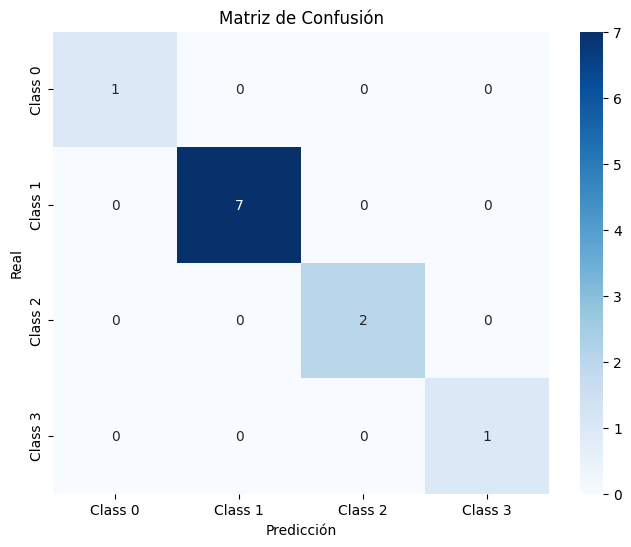

In [9]:
# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_true_flat, y_pred_flat)

# Etiquetas correctas para las 10 clases
labels = ["Class {}".format(i) for i in range(4)]

# Mostrar matriz de confusión con heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()